Project overview:
    
    The goal of project was implementing CNN for cat vs dog recognition using CIFAR10 dataset.
    During work on preject I've decided to slightly change topic, to build cassifier to recognize all classes of    animals 
    that are available in this dataset.
    
    I've devided this notebook into few parts:
        
        - Loading data
        - Simple visual data exploration
        - Preparing data 
        - Building model architecture
        - Training and evaluating model
        - Improving performace of model
        - Conclusions
        

In [6]:
import numpy as np
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.datasets import cifar10

from skimage import color, exposure

%matplotlib inline
import matplotlib.pyplot as plt

## Loading data

In [7]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

## Preparing data

 Getting rid of images and labels that are not aminals 

In [15]:
img_rows = 32
img_cols = 32

In [10]:
X_train = X_train[np.isin(y_train, [2, 3, 4, 5, 6 ,7]).reshape(-1)]
y_train = y_train[np.isin(y_train, [2, 3, 4, 5, 6 ,7])]

In [11]:
X_test = X_test[np.isin(y_test, [2, 3, 4, 5, 6 ,7]).reshape(-1)]
y_test = y_test[np.isin(y_test, [2, 3, 4, 5, 6 ,7])]

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30000, 32, 32, 3), (6000, 32, 32, 3), (30000,), (6000,))

In [13]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)

Defining model variables

In [14]:
#defining input layer size
input_shape = (X_train.shape[1], X_train.shape[2], 3) 

#defining number of classes
num_classes = 6

## Plot example data

In [17]:
#defining image description
desc = {0 : '',
       1 : '',
       2 : 'bird',
       3 : 'cat',
       4 : 'deer',
       5 : 'dog',
       6 : 'frog',
       7 : 'horse'}

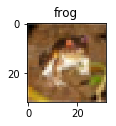

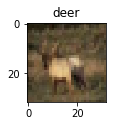

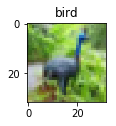

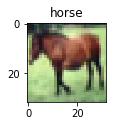

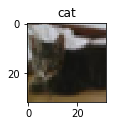

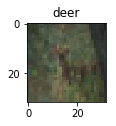

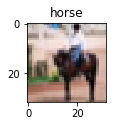

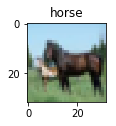

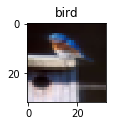

In [39]:
for i in range(9):
    plt.figure(figsize=(15,5))
    plt.subplot('19{}'.format(i+1))
    plt.imshow(X_train[i])
    plt.title(desc[int(y_train[i])])
    plt.show()

## Data normalization

In [40]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)


X_train = X_train/255
X_test = X_test/255
#because I've decided to drop non animals images
y_train = y_train - 2
y_test = y_test -2


One hot encoding

In [41]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [15]:
y_train

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

## Building model architecture, training and evaluation

Since my task is image recognition i've decided to build CNN. 
My first attempt contains two convolutional layers, each followed by MaxPooling layer. 
Then i put once Fully Connected layer and output layer with softmax as activation, since it's 
multiclass recognition problem.

In [42]:
def create_model(filters=32, drop=0.3,dense=1024):
    return Sequential([
        Conv2D(filters, kernel_size=(3,3), activation='relu' ,input_shape=input_shape),
        MaxPool2D(pool_size=(2,2)),
        
        Conv2D(2*filters, kernel_size=(3,3), activation='relu'),
        MaxPool2D(pool_size=(2,2)),
        
        
        Flatten(),
        
        Dense(dense, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax'),
        
    ])


After building network, i want to see total numper of parameters to train and overall network shape

In [43]:
model=create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              2360320   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0

Model compiling and training.

For loss function i've choosen categorical_crossentropy,
as optimizer adam
and metrics that will be my success metrice is accuracy.

In [44]:
model=create_model()

In [45]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [46]:
#training model
result = model.fit(X_train, 
          y_train,
          batch_size=256,
          epochs=20,
          validation_data=(X_test, y_test))

Train on 30000 samples, validate on 6000 samples
Epoch 1/20
30000/30000 [==============================] - 16s 518us/sample - loss: 1.4507 - accuracy: 0.4246 - val_loss: 1.2927 - val_accuracy: 0.5018
Epoch 2/20
30000/30000 [==============================] - 17s 553us/sample - loss: 1.1804 - accuracy: 0.5481 - val_loss: 1.1271 - val_accuracy: 0.5818
Epoch 3/20
30000/30000 [==============================] - 15s 487us/sample - loss: 1.0655 - accuracy: 0.5968 - val_loss: 1.0520 - val_accuracy: 0.6030
Epoch 4/20
30000/30000 [==============================] - 15s 487us/sample - loss: 0.9791 - accuracy: 0.6328 - val_loss: 1.1307 - val_accuracy: 0.5748
Epoch 5/20
30000/30000 [==============================] - 15s 496us/sample - loss: 0.9229 - accuracy: 0.6547 - val_loss: 0.9768 - val_accuracy: 0.6385
Epoch 6/20
30000/30000 [==============================] - 15s 501us/sample - loss: 0.8601 - accuracy: 0.6797 - val_loss: 0.9661 - val_accuracy: 0.6433
Epoch 7/20
30000/30000 [=====================

In [68]:
#methods for printing learing curves

def print_result(result):
    print('Model loss on valid set :  ' + str(result.history['val_loss'][-1]))
    print('Model accuracy on valid set :  ' + str(result.history['val_accuracy'][-1] *100)+ "%")
    

def plot_learning_curve(result, key='accuracy'):
    print_result(result)
    plt.plot(result.history[key])
    plt.plot(result.history['val_' + key])
    plt.xlabel('epochs')
    plt.ylabel(key)
    plt.title('Learing curve')
    plt.legend(['train', 'test'], loc='best')
    plt.show()

In [ ]:
Model learining curves

Model loss on valid set :  1.0731864744822184
Model accuracy on valid set :  70.41666507720947%


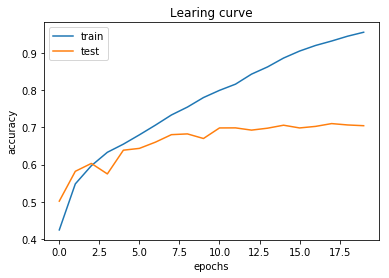

In [69]:
plot_learning_curve(result, key='accuracy')

Model loss on valid set :  1.0731864744822184
Model accuracy on valid set :  70.41666507720947%


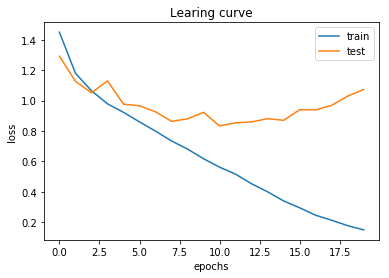

In [70]:
plot_learning_curve(result, key='loss')

Summary:
    
    As seen from plots, model overfits training data a lot, aswell on loss plot is can be seen, that loss increases with epochs.
    

Model 2

To decresee overfitting I've added Dropout and BatchNorm layer.
    
I have also decided to increase my network size by adding another conv2D + MaxPool layer

In [57]:
def create_model1(filters=32, drop=0.3,dense=1024):
    return Sequential([
        Conv2D(filters, kernel_size=(3,3), activation='relu' ,input_shape=input_shape),
        BatchNormalization(),
        MaxPool2D(pool_size=(2,2)),
        Dropout(drop),
        
        Conv2D(2*filters, kernel_size=(3,3), activation='relu'),
        BatchNormalization(),
        MaxPool2D(pool_size=(2,2)),
        Dropout(drop),
        
        Conv2D(4*filters, kernel_size=(3,3), activation='relu',padding='same'),
        BatchNormalization(),
        MaxPool2D(pool_size=(2,2)),
        Dropout(drop),
        
        Flatten(),
        
        Dense(dense, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax'),
        
    ])


In [58]:
model1=create_model1(dense = 512)
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)         

In [59]:
model1.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [60]:
result1 = model1.fit(X_train, 
          y_train,
          batch_size=128,
          epochs=50,
          validation_data=(X_test, y_test))

Train on 30000 samples, validate on 6000 samples
Epoch 1/50
30000/30000 [==============================] - 38s 1ms/sample - loss: 1.5595 - accuracy: 0.4158 - val_loss: 5.1274 - val_accuracy: 0.1767
Epoch 2/50
30000/30000 [==============================] - 49s 2ms/sample - loss: 1.2260 - accuracy: 0.5243 - val_loss: 2.1340 - val_accuracy: 0.3768
Epoch 3/50
30000/30000 [==============================] - 49s 2ms/sample - loss: 1.1240 - accuracy: 0.5671 - val_loss: 1.0794 - val_accuracy: 0.6000
Epoch 4/50
30000/30000 [==============================] - 41s 1ms/sample - loss: 1.0438 - accuracy: 0.6001 - val_loss: 2.0147 - val_accuracy: 0.4292
Epoch 5/50
30000/30000 [==============================] - 38s 1ms/sample - loss: 0.9814 - accuracy: 0.6292 - val_loss: 1.5253 - val_accuracy: 0.5233
Epoch 6/50
30000/30000 [==============================] - 39s 1ms/sample - loss: 0.9195 - accuracy: 0.6522 - val_loss: 0.9905 - val_accuracy: 0.6480
Epoch 7/50
30000/30000 [==============================] -

Learing Curves for model 2:

Model loss on valid set :  0.8448987723986308
Model accuracy on valid set :  75.83333253860474%


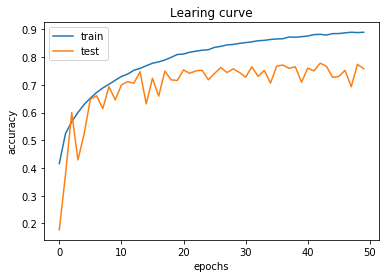

In [71]:
plot_learning_curve(result1)

Model loss on valid set :  0.8448987723986308
Model accuracy on valid set :  75.83333253860474%


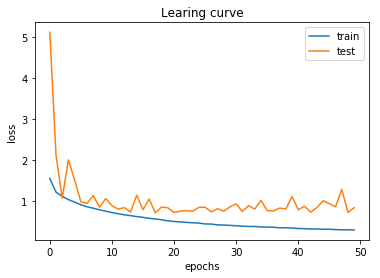

In [72]:
plot_learning_curve(result1, key='loss')

Summary:

This model as seen on plot tends to overfit aswell. In next approach I will increase dropout rate and try to put padding to more layers. 

Also want to try to build double conv + maxpool layers

For the future models to speed up learining process i will decrese epoch number.



Model 3

In [77]:
def create_model_2(filters=32, drop=0.3,dense=1024):
    return Sequential([
        Conv2D(filters, kernel_size=(3,3), activation='relu' ,input_shape=input_shape),
        Conv2D(filters, kernel_size=(3,3), activation='relu'),
        BatchNormalization(),
        MaxPool2D(pool_size=(2,2)),
        Dropout(drop),
        
        Conv2D(2*filters, kernel_size=(3,3), activation='relu', padding='same'),
        Conv2D(2*filters, kernel_size=(3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPool2D(pool_size=(2,2)),
        Dropout(drop),
        
        Conv2D(4*filters, kernel_size=(3,3), activation='relu',padding='same'),
        Conv2D(4*filters, kernel_size=(3,3), activation='relu',padding='same'),
        BatchNormalization(),
        MaxPool2D(pool_size=(2,2)),
        Dropout(drop),
        
        Flatten(),
        
        Dense(dense, activation='relu'),
        Dropout(drop),
        Dense(dense/2, activation='relu'),
        Dense(num_classes, activation='softmax'),
        
    ])

In [78]:
model_2 = create_model_2(drop=0.5, dense=1024)
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 64)       

In [79]:
model_2.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [80]:
results_2 = model_2.fit(X_train, 
          y_train,
          batch_size=128,
          epochs=25,
          validation_data=(X_test, y_test)
            )

Train on 30000 samples, validate on 6000 samples
Epoch 1/25
30000/30000 [==============================] - 80s 3ms/sample - loss: 1.7419 - accuracy: 0.3299 - val_loss: 2.3356 - val_accuracy: 0.1630
Epoch 2/25
30000/30000 [==============================] - 77s 3ms/sample - loss: 1.3961 - accuracy: 0.4475 - val_loss: 1.8740 - val_accuracy: 0.3072
Epoch 3/25
30000/30000 [==============================] - 95s 3ms/sample - loss: 1.2477 - accuracy: 0.5108 - val_loss: 1.5058 - val_accuracy: 0.4278
Epoch 4/25
30000/30000 [==============================] - 100s 3ms/sample - loss: 1.1699 - accuracy: 0.5496 - val_loss: 1.1514 - val_accuracy: 0.5395
Epoch 5/25
30000/30000 [==============================] - 88s 3ms/sample - loss: 1.0967 - accuracy: 0.5749 - val_loss: 1.1384 - val_accuracy: 0.5622
Epoch 6/25
30000/30000 [==============================] - 89s 3ms/sample - loss: 1.0432 - accuracy: 0.6004 - val_loss: 1.1494 - val_accuracy: 0.5745
Epoch 7/25
30000/30000 [==============================] 

Model loss on valid set :  0.5975406498908996
Model accuracy on valid set :  80.0499975681305%


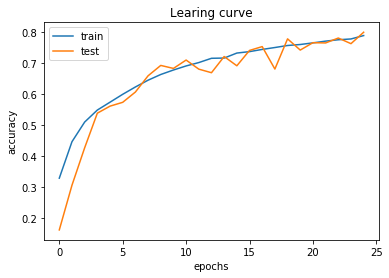

In [82]:
plot_learning_curve(results_2)

Model loss on valid set :  0.5975406498908996
Model accuracy on valid set :  80.0499975681305%


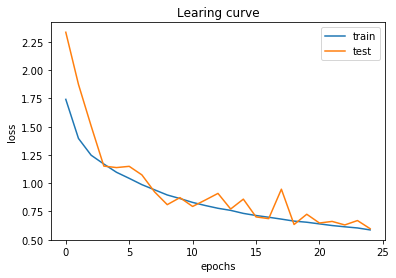

In [83]:
plot_learning_curve(results_2, key='loss')

Higher Dropout  rate helped with overfitting, but still there is high bias problem in my model. Adding conv layers improved accuracy by 3% and I assume it could be even more with more epochs. 

Conclusions:
    Presented solution solves overfitting problem, but there is very high bias error.

    Model accuracy is around 80%, while loss fuction value: 0.59.
    Final model contains 9 layers with total amount of parameters 1,996,454
    For training network I've used batch = 128 and 25 epochs

    My solution is generating more data with data augmentation process.
    
    Also i think it is possible to use transfer learning from models like ResNet50 or VGG16, but it would be required to change resolution of images.
    
    Adding another layers wouldnt improve the performance of model, furthermore there is possibility of vanishing gradient 
    
